<a href="https://colab.research.google.com/github/EarlyOcean/PCD_Assignment01/blob/main/PCD_Assignment01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import cv2
from google.colab.patches import cv2_imshow  # to display in Colab
import numpy as np

In [46]:
!rm -rf PCD_Assignment01
!git clone https://github.com/EarlyOcean/PCD_Assignment01

Cloning into 'PCD_Assignment01'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 12 (delta 2), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (12/12), 140.60 KiB | 1.03 MiB/s, done.
Resolving deltas: 100% (2/2), done.


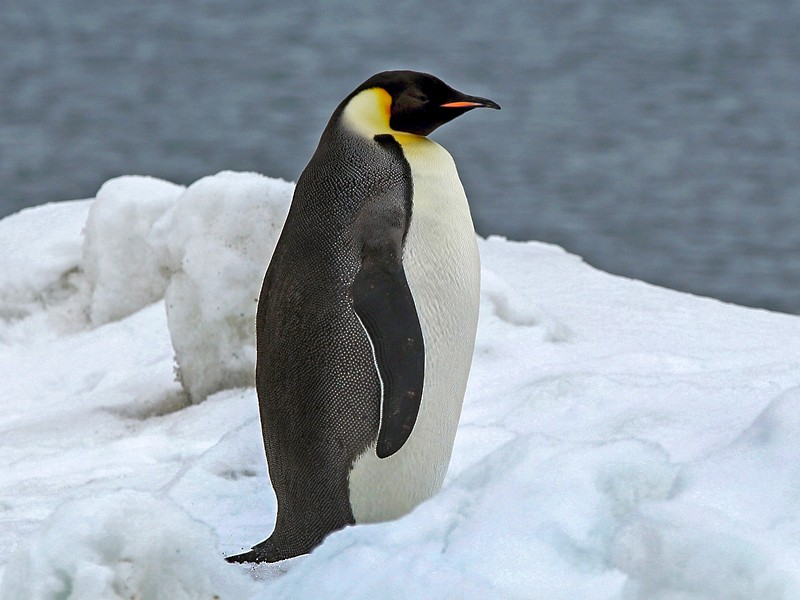

In [47]:
# original image
original_img = cv2.imread("/content/PCD_Assignment01/penguin.jpg")
original_height, original_width, _ = original_img.shape

cv2_imshow(original_img)

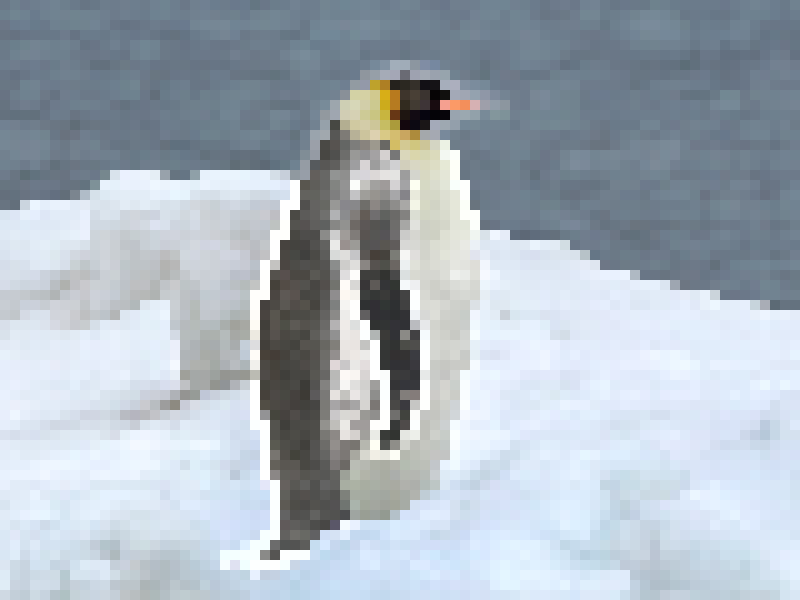

In [48]:
# max downsampled

def max_downsample(image, block_size):
    height, width, channels = image.shape
    downsampled_height = height // block_size
    downsampled_width = width // block_size
    downsampled_image = np.zeros((downsampled_height, downsampled_width, channels), dtype=image.dtype)

    for i in range(downsampled_height):
        for j in range(downsampled_width):
            for c in range(channels):
                block = image[i * block_size:(i + 1) * block_size,
                              j * block_size:(j + 1) * block_size,
                              c]
                downsampled_image[i, j, c] = np.max(block)

    return downsampled_image

img_result = max_downsample(original_img, 10)

resized_img_result = cv2.resize(img_result, (original_width, original_height), interpolation=cv2.INTER_NEAREST)
cv2_imshow(resized_img_result)

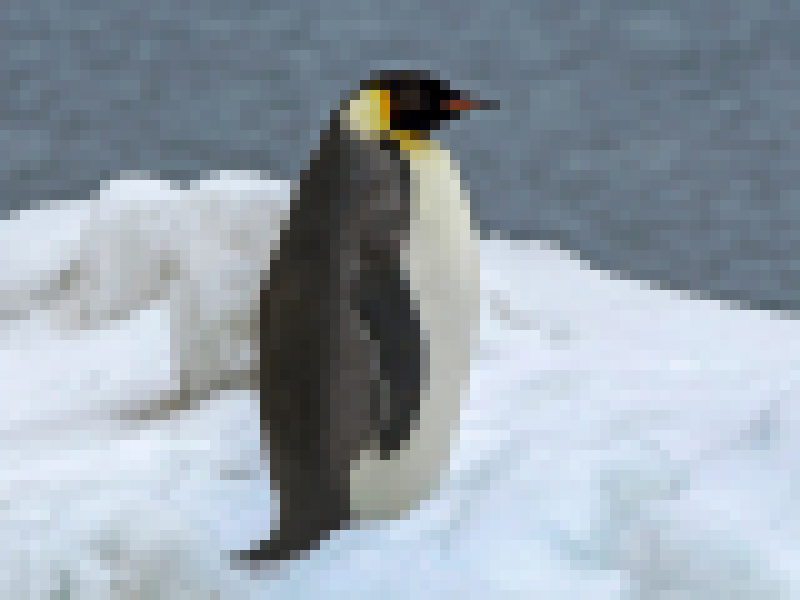

In [49]:
# average downsampled

def average_downsample(image, block_size):
    height, width, channels = image.shape
    downsampled_height = height // block_size
    downsampled_width = width // block_size
    downsampled_image = np.zeros((downsampled_height, downsampled_width, channels), dtype=image.dtype)

    for i in range(downsampled_height):
        for j in range(downsampled_width):
            for c in range(channels):
                block = image[i * block_size:(i + 1) * block_size,
                              j * block_size:(j + 1) * block_size,
                              c]
                downsampled_image[i, j, c] = np.average(block)

    return downsampled_image

img_result = average_downsample(original_img, 10)

resized_img_result = cv2.resize(img_result, (original_width, original_height), interpolation=cv2.INTER_NEAREST)
cv2_imshow(resized_img_result)

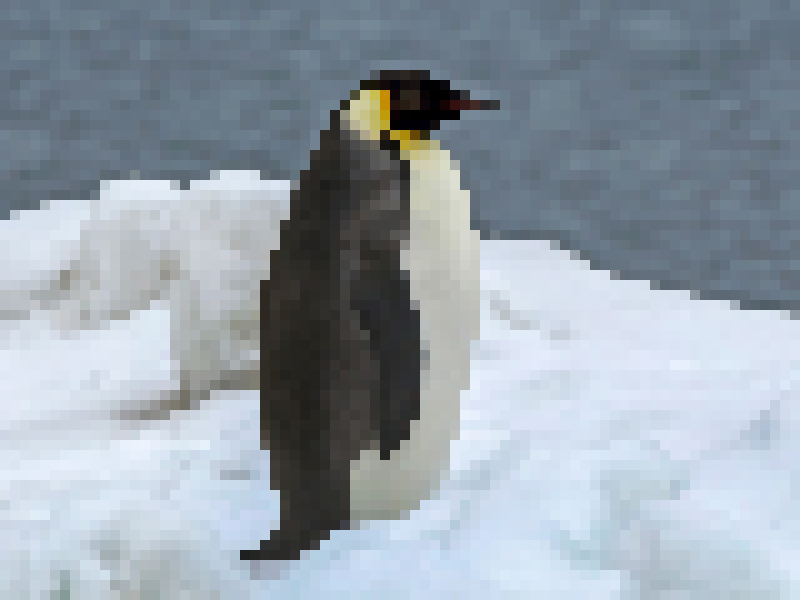

In [52]:
# median downsampled

def median_downsample(image, block_size):
    height, width, channels = image.shape
    downsampled_height = height // block_size
    downsampled_width = width // block_size
    downsampled_image = np.zeros((downsampled_height, downsampled_width, channels), dtype=image.dtype)

    for i in range(downsampled_height):
        for j in range(downsampled_width):
            for c in range(channels):
                block = image[i * block_size:(i + 1) * block_size,
                              j * block_size:(j + 1) * block_size,
                              c]
                downsampled_image[i, j, c] = np.median(block)

    return downsampled_image

img_result = median_downsample(original_img, 10)

resized_img_result = cv2.resize(img_result, (original_width, original_height), interpolation=cv2.INTER_NEAREST)
cv2_imshow(resized_img_result)

In [ ]:
# nearest neighbour downsampled

def nn_upsample(image, block_size):
    height, width, channels = image.shape
    upsampled_height = height * block_size
    upsampled_width = width * block_size
    upsampled_image = np.zeros((upsampled_height, upsampled_width, channels), dtype=image.dtype)

    for i in range(upsampled_height):
        for j in range(upsampled_width):
            for c in range(channels):
                block = image[i * block_size:(i + 1) * block_size,
                              j * block_size:(j + 1) * block_size,
                              c]
                upsampled_image[i, j, c] = np.median(block)

    return upsampled_image

img_result = nn_upsample(original_img, 10)

resized_img_result = cv2.resize(img_result, (original_width, original_height), interpolation=cv2.INTER_NEAREST)
cv2_imshow(resized_img_result)

In [ ]:
# bilinear upsample

def bilinear_upsample(image, block_size):
    height, width, channels = image.shape
    upsampled_height = height * block_size
    upsampled_width = width * block_size
    upsampled_image = np.zeros((upsampled_height, upsampled_width, channels), dtype=image.dtype)

    for i in range(upsampled_height):
        for j in range(upsampled_width):
            for c in range(channels):
                block = image[i * block_size:(i + 1) * block_size,
                              j * block_size:(j + 1) * block_size,
                              c]
                upsampled_image[i, j, c] = np.median(block)

    return upsampled_image

img_result = bilinear_upsample(original_img, 10)

resized_img_result = cv2.resize(img_result, (original_width, original_height), interpolation=cv2.INTER_NEAREST)
cv2_imshow(resized_img_result)

In [ ]:
# bicubic upsample

def bicubic_upsample(image, block_size):
    height, width, channels = image.shape
    upsampled_height = height * block_size
    upsampled_width = width * block_size
    upsampled_image = np.zeros((upsampled_height, upsampled_width, channels), dtype=image.dtype)

    for i in range(upsampled_height):
        for j in range(upsampled_width):
            for c in range(channels):
                block = image[i * block_size:(i + 1) * block_size,
                              j * block_size:(j + 1) * block_size,
                              c]
                upsampled_image[i, j, c] = np.median(block)

    return upsampled_image

img_result = bicubic_upsample(original_img, 10)

resized_img_result = cv2.resize(img_result, (original_width, original_height), interpolation=cv2.INTER_NEAREST)
cv2_imshow(resized_img_result)